In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define dependent variable and chosen predictors
dependent_variable = "WELLNESS_life_satisfaction"
chosen_predictors = [
    "CONNECTION_community_involvement_union_p3m",
    "CONNECTION_community_involvement_sports_p3m",
    "CONNECTION_community_involvement_hobby_p3m",
    "CONNECTION_community_involvement_youth_p3m"
]

# Filter dataset for these predictors and the dependent variable
chosen_data = dataset[[dependent_variable] + chosen_predictors].dropna()

# Convert categorical predictors to binary variables using one-hot encoding
chosen_data_encoded = pd.get_dummies(
    chosen_data,
    columns=chosen_predictors,
    drop_first=True
)

# Define input (X) and output (y) variables after encoding
X_chosen_encoded = chosen_data_encoded.drop(columns=[dependent_variable])
y_chosen_encoded = chosen_data_encoded[dependent_variable]

# Fit the linear regression model
reg_model_encoded = LinearRegression()
reg_model_encoded.fit(X_chosen_encoded, y_chosen_encoded)

# Calculate R-squared value
r_squared_encoded = reg_model_encoded.score(X_chosen_encoded, y_chosen_encoded)
print(f"R-squared Value: {r_squared_encoded:.3f}")

# Extract regression coefficients
coefficients_encoded = pd.DataFrame({
    "Feature": X_chosen_encoded.columns,
    "Coefficient": reg_model_encoded.coef_
})
coefficients_encoded["Intercept"] = reg_model_encoded.intercept_

# Print regression coefficients
print("Encoded Predictors Regression Model Summary:")
print(coefficients_encoded)


R-squared Value: 0.104
Encoded Predictors Regression Model Summary:
                                              Feature  Coefficient  Intercept
0   CONNECTION_community_involvement_union_p3m_No,...    -0.192654   5.737001
1   CONNECTION_community_involvement_union_p3m_Pre...     0.248138   5.737001
2      CONNECTION_community_involvement_union_p3m_Yes     0.545380   5.737001
3   CONNECTION_community_involvement_sports_p3m_No...    -0.214669   5.737001
4   CONNECTION_community_involvement_sports_p3m_Pr...    -1.128608   5.737001
5     CONNECTION_community_involvement_sports_p3m_Yes     1.026659   5.737001
6   CONNECTION_community_involvement_hobby_p3m_No,...     0.171224   5.737001
7   CONNECTION_community_involvement_hobby_p3m_Pre...     1.262599   5.737001
8      CONNECTION_community_involvement_hobby_p3m_Yes     0.712314   5.737001
9   CONNECTION_community_involvement_youth_p3m_No,...     0.147973   5.737001
10  CONNECTION_community_involvement_youth_p3m_Pre...     0.574483   5.737

In [2]:
# Calculate R-squared value
r_squared_encoded = reg_model_encoded.score(X_chosen_encoded, y_chosen_encoded)

# Explanation of R-squared
print(f"R-squared Value: {r_squared_encoded:.3f}")
print(f"This means that {r_squared_encoded*100:.2f}% of the variance in life satisfaction "
      f"is explained by the selected community involvement predictors.")


R-squared Value: 0.104
This means that 10.44% of the variance in life satisfaction is explained by the selected community involvement predictors.


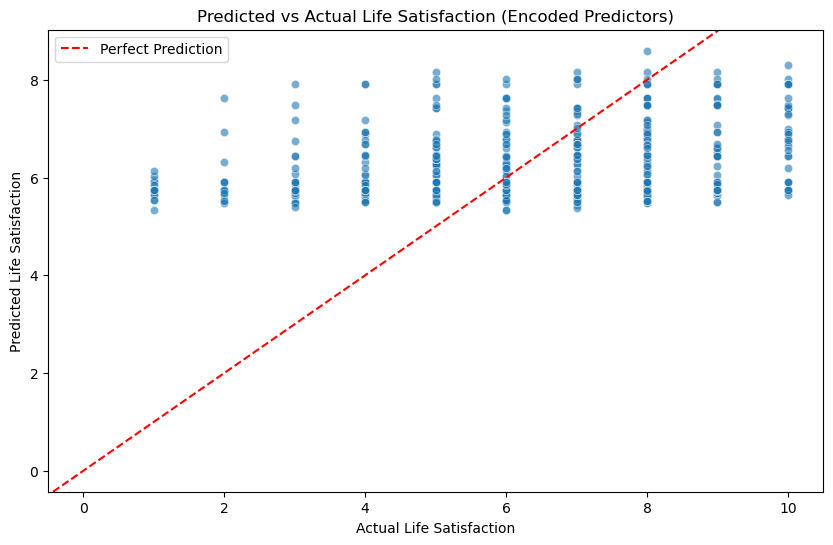

/tmp/ipykernel_52/2379319689.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


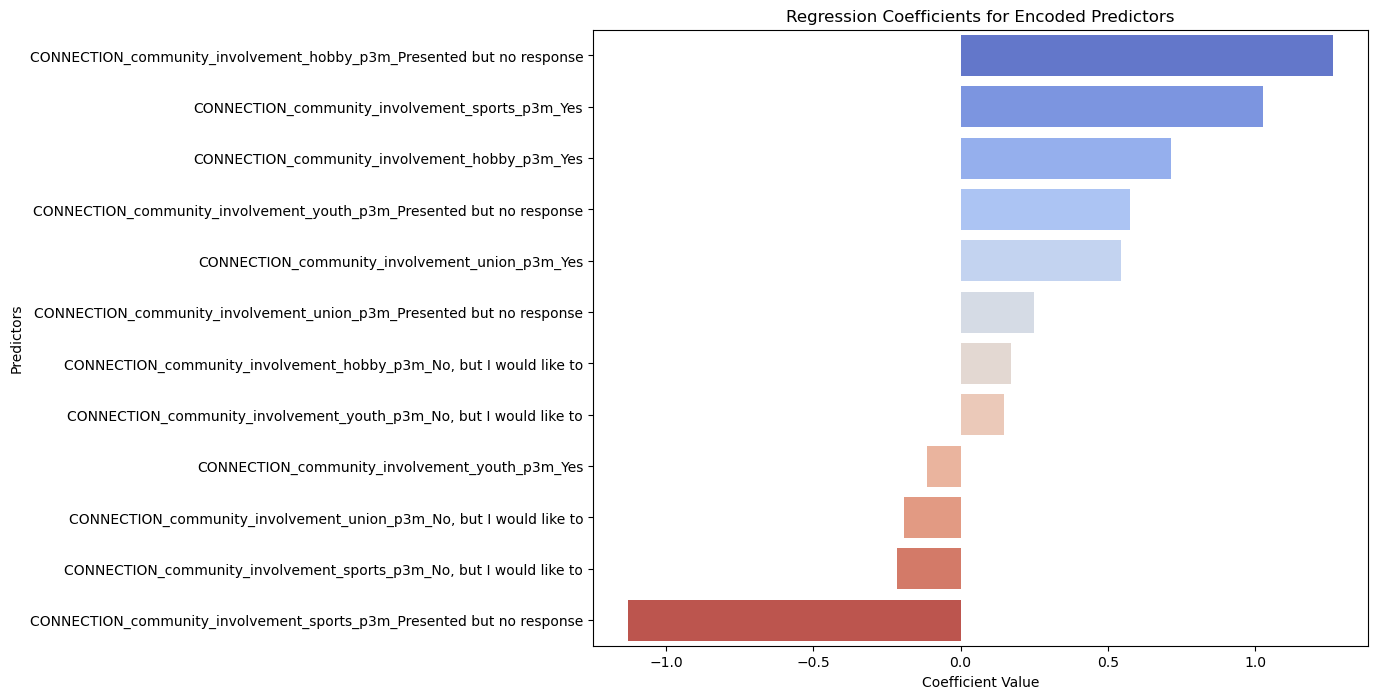

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update with the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Define predictors and dependent variable
dependent_variable = "WELLNESS_life_satisfaction"
chosen_predictors = [
    "CONNECTION_community_involvement_union_p3m",
    "CONNECTION_community_involvement_sports_p3m",
    "CONNECTION_community_involvement_hobby_p3m",
    "CONNECTION_community_involvement_youth_p3m"
]

# Filter data
chosen_data = dataset[[dependent_variable] + chosen_predictors].dropna()
chosen_data_encoded = pd.get_dummies(
    chosen_data, 
    columns=chosen_predictors, 
    drop_first=True
)

# Define X and y
X_chosen_encoded = chosen_data_encoded.drop(columns=[dependent_variable])
y_chosen_encoded = chosen_data_encoded[dependent_variable]

# Fit linear regression model
reg_model_encoded = LinearRegression()
reg_model_encoded.fit(X_chosen_encoded, y_chosen_encoded)

# Predicted vs Actual Plot
y_pred_encoded = reg_model_encoded.predict(X_chosen_encoded)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_chosen_encoded, y=y_pred_encoded, alpha=0.6)
plt.title("Predicted vs Actual Life Satisfaction (Encoded Predictors)")
plt.xlabel("Actual Life Satisfaction")
plt.ylabel("Predicted Life Satisfaction")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()

# Coefficients Bar Plot
coefficients_encoded = pd.DataFrame({
    "Feature": X_chosen_encoded.columns,
    "Coefficient": reg_model_encoded.coef_
})
coefficients_encoded_sorted = coefficients_encoded.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x=coefficients_encoded_sorted["Coefficient"],
    y=coefficients_encoded_sorted["Feature"],
    palette="coolwarm"
)
plt.title("Regression Coefficients for Encoded Predictors")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictors")
plt.show()


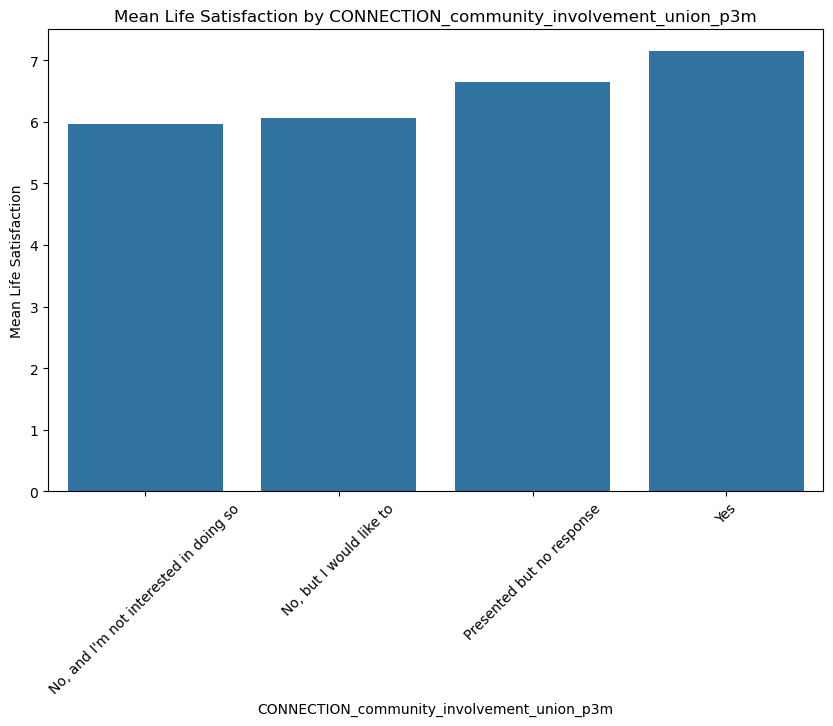

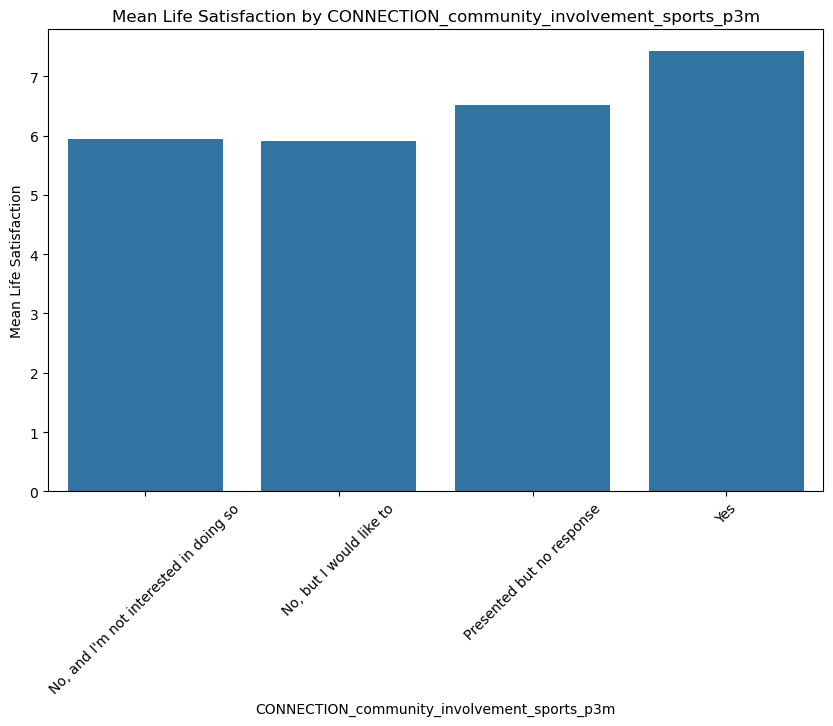

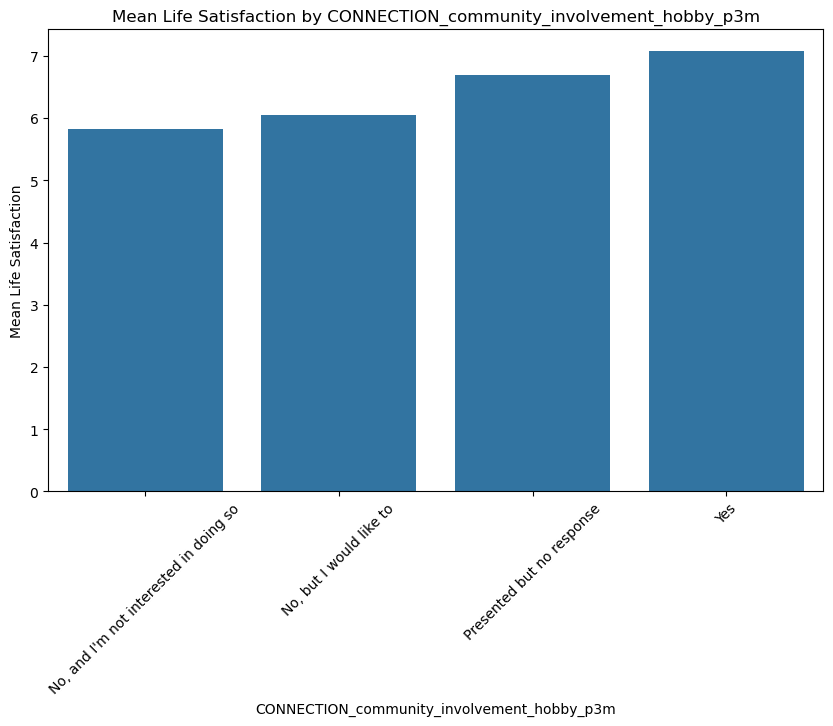

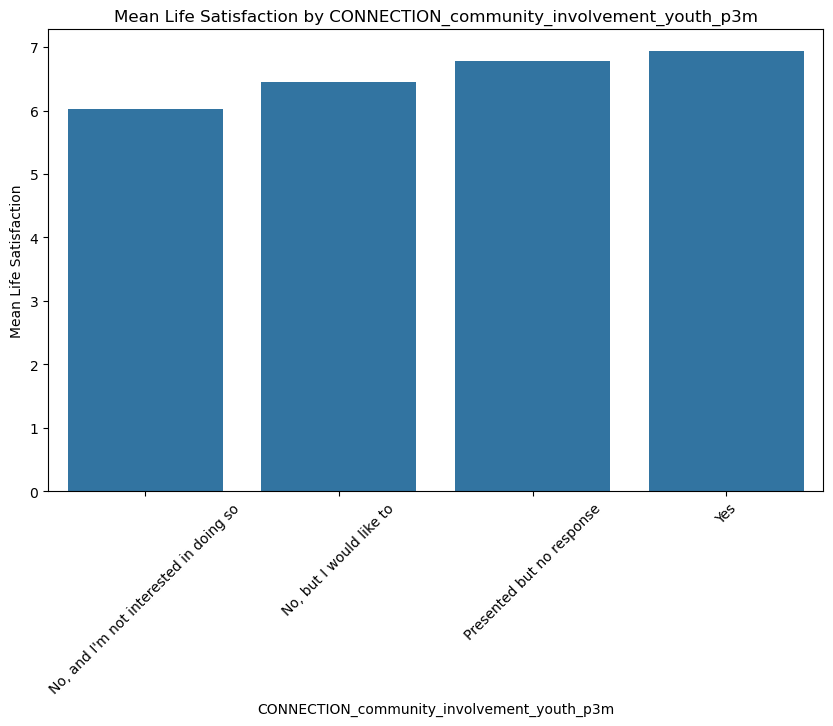

In [6]:
# Visualize the relationship between each predictor and the mean life satisfaction
for predictor in chosen_predictors:
    # Group data by the predictor and calculate the mean life satisfaction
    predictor_means = chosen_data.groupby(predictor)[dependent_variable].mean().reset_index()
    
    # Bar plot of mean life satisfaction by predictor levels
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=predictor,
        y=dependent_variable,
        data=predictor_means,
        errorbar=None  # Disable error bars for simplicity
    )
    plt.title(f"Mean Life Satisfaction by {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Mean Life Satisfaction")
    plt.xticks(rotation=45)
    plt.show()


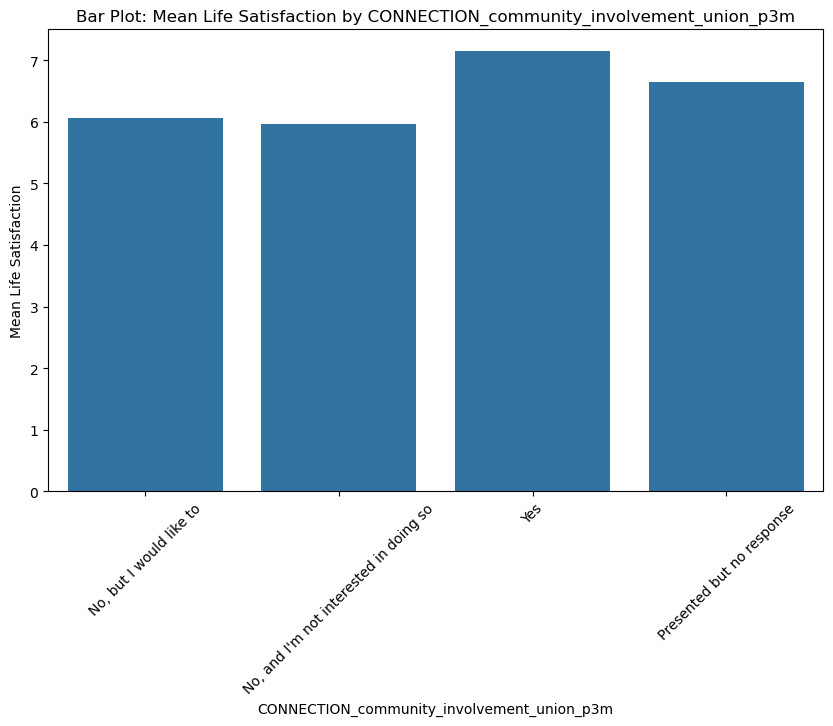

/tmp/ipykernel_52/2708738433.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


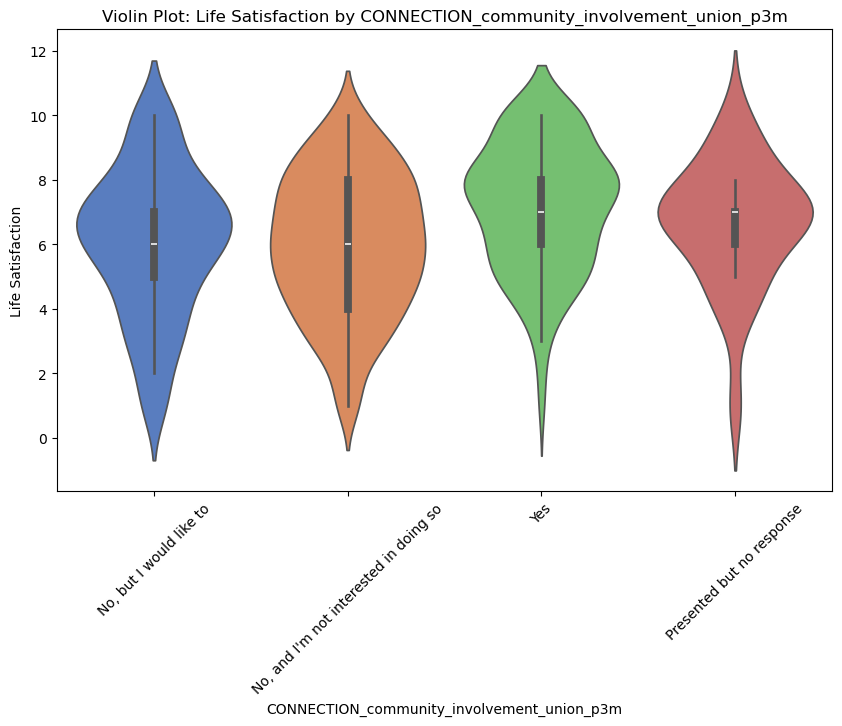

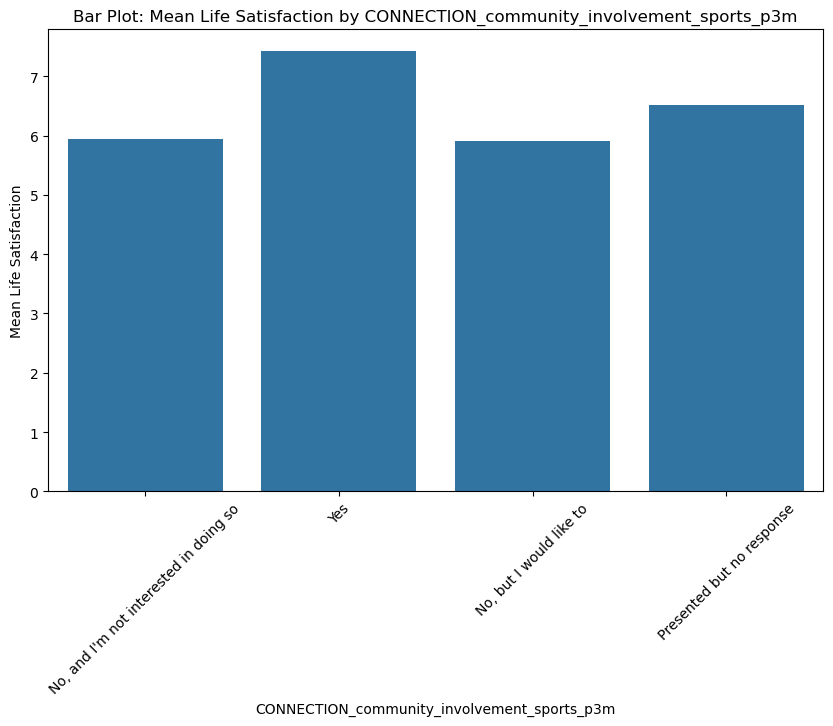

/tmp/ipykernel_52/2708738433.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


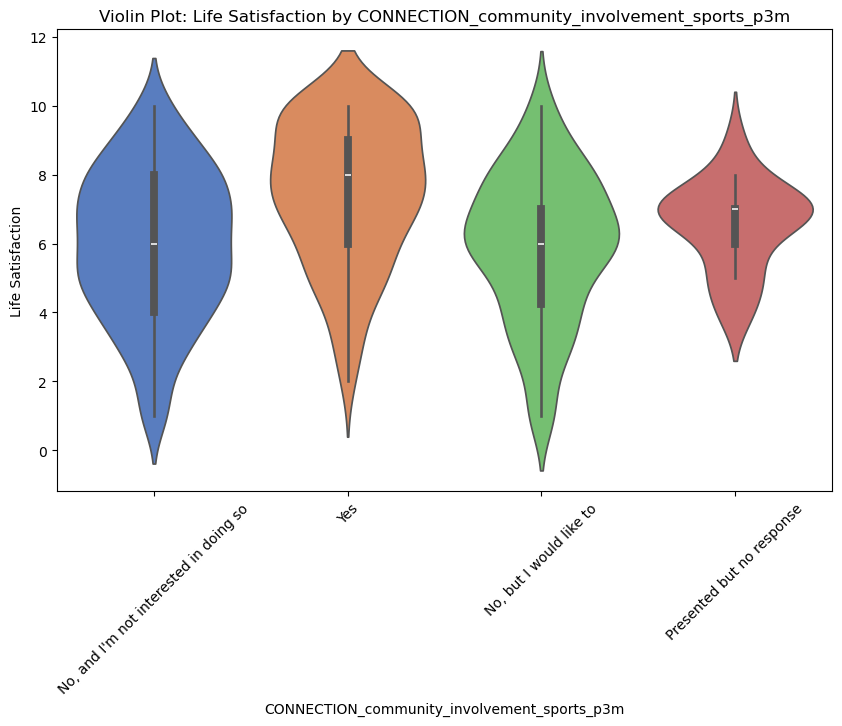

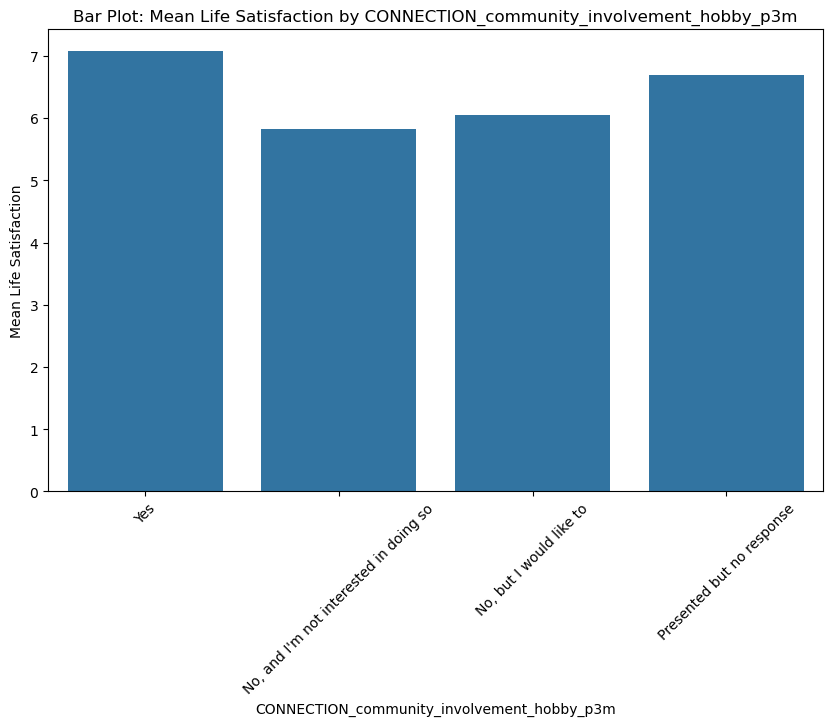

/tmp/ipykernel_52/2708738433.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


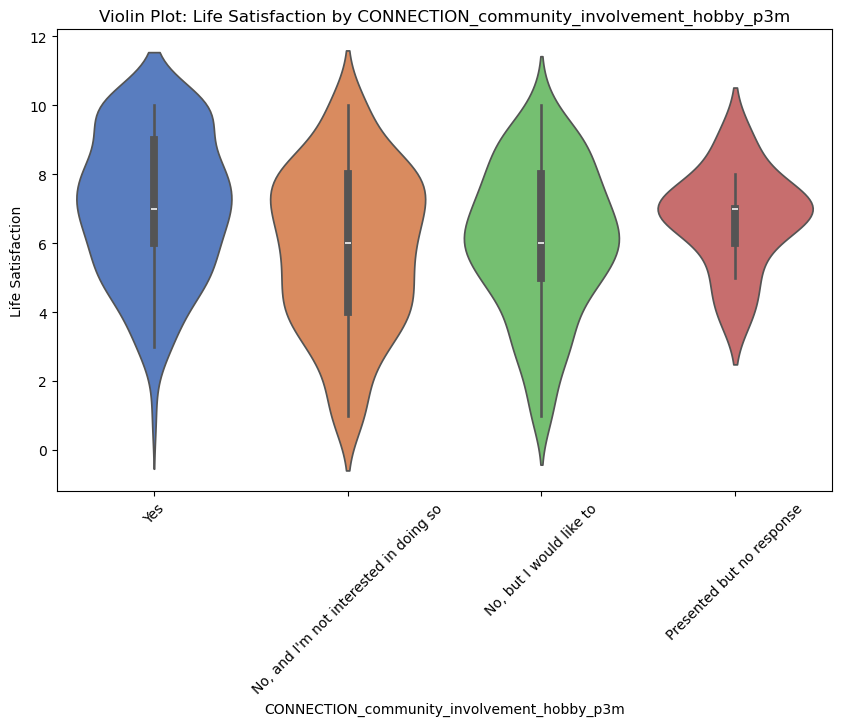

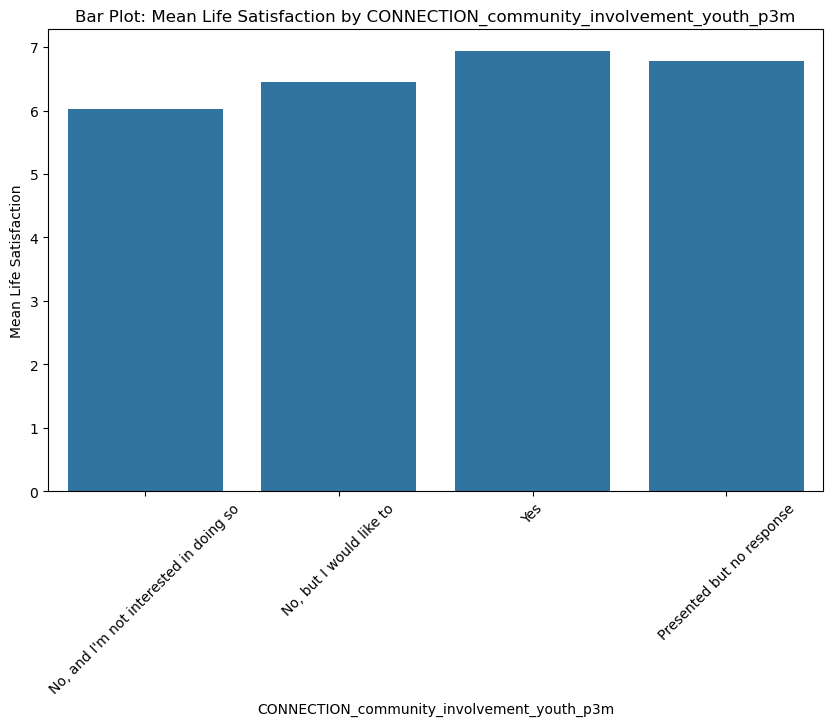

/tmp/ipykernel_52/2708738433.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


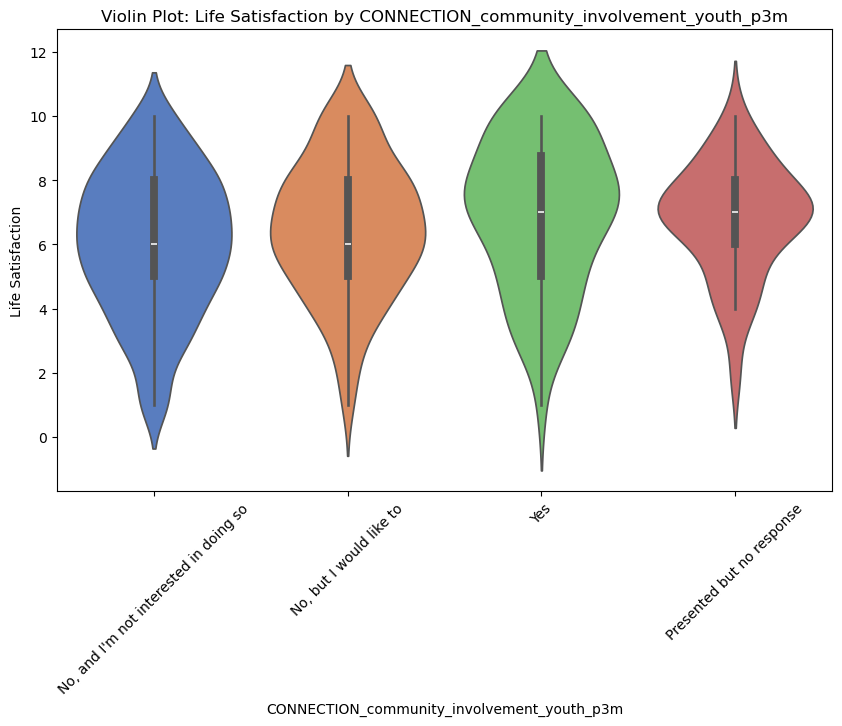

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define dependent variable and chosen predictors
dependent_variable = "WELLNESS_life_satisfaction"
chosen_predictors = [
    "CONNECTION_community_involvement_union_p3m",
    "CONNECTION_community_involvement_sports_p3m",
    "CONNECTION_community_involvement_hobby_p3m",
    "CONNECTION_community_involvement_youth_p3m"
]

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'  # Update the correct file path
dataset = pd.read_csv(file_path, low_memory=False)

# Filter dataset for these predictors and the dependent variable
chosen_data = dataset[[dependent_variable] + chosen_predictors].dropna()

# Generate bar plots and violin plots
for predictor in chosen_predictors:
    # Bar plot: Mean life satisfaction by predictor levels
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=predictor,
        y=dependent_variable,
        data=chosen_data,
        estimator="mean",
        errorbar=None
    )
    plt.title(f"Bar Plot: Mean Life Satisfaction by {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Mean Life Satisfaction")
    plt.xticks(rotation=45)
    plt.show()

    # Violin plot: Distribution of life satisfaction by predictor levels
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        x=predictor,
        y=dependent_variable,
        data=chosen_data,
        palette="muted"
    )
    plt.title(f"Violin Plot: Life Satisfaction by {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Life Satisfaction")
    plt.xticks(rotation=45)
    plt.show()
